In [145]:
# Erin Shi
# Student ID: 5497094

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from CSV
data = pd.read_csv('./quality.csv')

# Data Preprocessing
# Map 'G' as 1 and 'B' as 0 in the 'label' column
data['label'] = data['label'].map({'G': 1, 'B': 0})

# Remove the 'S.No.' column as it is unnecessary for the model
data.drop('S.No.', axis=1, inplace=True)

# Separate the features (X) and the target label (y)
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target label

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
# Standardize features using StandardScaler to bring them to a similar scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression(C = 1, max_iter=1000)  # Create a Logistic Regression model

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)  # Make predictions using the trained model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f'Accuracy: {accuracy}')  # Print the accuracy score

# Print a classification report to see precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# 3-Fold Cross-Validation
# Create a KFold object for 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation to evaluate model performance on multiple splits of the data
cv_scores = cross_val_score(model, scaler.transform(X), y, cv=kf)


# Print the average accuracy from cross-validation
print(f'Average Accuracy (3-Fold CV): {cv_scores.mean()}')


Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

Average Accuracy (3-Fold CV): 0.7814814814814816


In [147]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC (calculated using roc_curve and auc): {roc_auc}')


ROC AUC (calculated using roc_curve and auc): 0.875


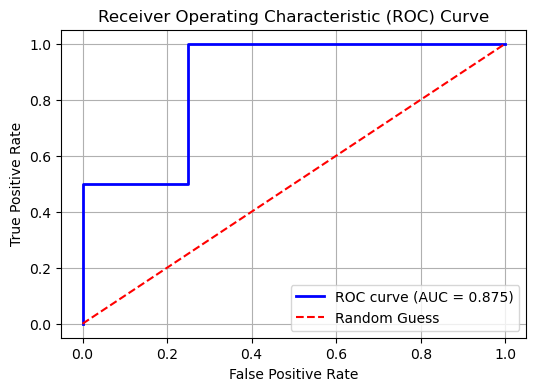

In [148]:
# Plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()
